# Klassifitseerimise mudelid
Autorid: Lana Teras, Kristina Kudryavtseva

Õppejõud: Olga Dunajeva

05.05.2024


Käesolevas õppematerjalis on esitatud klassifitseerimise mudeli konstrueerimise meetodid Drug Consumption Classification andmestiku näitel. Andmestik on võetud saidilt [kaggle.com](https://www.kaggle.com/datasets/mexwell/drug-consumption-classification). Kõik sisendatribuudid on algselt kategoorilised ja kvantifitseeritud. Pärast kvantifitseerimist võib kõigi sisendomaduste väärtusi käsitleda kui reaalarvulisi

Andmestiku tunnused:

* **ID**: Unique ID
* **Age**: Age is the age of participant
* **Gender**: Gender is gender of participant
* **Education**: Education is level of education of participant
* **Country**: Country is country of current residence of participant
* **Ethnicity**: Ethnicity is ethnicity of participant
* **Nscore**: Nscore is NEO-FFI-R Neuroticism ([üksikasjad allpool](#details))
* **EScore**: Escore (*Real*) is NEO-FFI-R Extraversion
* **Oscore**: Oscore (*Real*) is NEO-FFI-R Openness to experience
* **Ascore**: Ascore (*Real*) is NEO-FFI-R Agreeableness
* **Cscore**: Cscore (*Real*) is NEO-FFI-R Conscientiousness
* **Impulsive**: Impulsive (*Real*) is impulsiveness measured by BIS-11
* **Sensation**: SS (*Real*) is sensation seeing measured by ImpSS
* **Others**: The remaining columns are name of drugs


<a id='details'> </a>

1. **Nscore** is NEO-FFI-R Neuroticism. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.

2. **Escore** (Real) is NEO-FFI-R Extraversion. It indicates how outgoing and social a person is. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.

3. **Oscore** (Real) is NEO-FFI-R Openness to experience. It indicates how open-minded a person is. A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine.

4. **Ascore** (Real) is NEO-FFI-R Agreeableness. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others.

5.  **Cscore** (Real) is NEO-FFI-R Conscientiousness. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation.



 **Eesmärk**: sõltuvusainete tarvitamise kalduvuse ennustamine temperamendi järgi. **Sihttunnus**: Y = Temperament.

## Sisukord

* [Andmed](#visu)
* [Mudeli konstrueerimine](#puu)

<a id='klass'></a>

## Klassifitseerimine
Klassifitseerimine tähendab objekti liigi ennustamist vastavalt klassifikaatorile st arvutuslikule mudelile, mis väljastab kas objekti liigi või tõenäosusliku ennustuse. Klassifikaatorid treenitakse objektide peal, mille klass on teada, kasutades klassifikaatori tüübile sobivaid treeningmeetodeid.

# Andmed

<a id='visu'></a>

## Andmete taastamine ja lugemine

Loeme andmestkuga faili.

In [203]:
import pandas as pd
drugs = pd.read_csv('/content/drug_consumption.csv')

Kuna andmed on juba töödeldud ja teatud väljanägemiseni viidud, siis paneme need tagasi algsesse olekusse, et neid oleks lihtsam analüüsi käigus lugeda. Lisaks emaldame 'ID' veerg, kuna see ei anna meile olulist infot.

In [204]:
drugs.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.4979,0.4825,-0.0592,0.9608,0.1260,0.3129,-0.5755,-0.5833,-0.9170,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.0785,-0.4825,1.9844,0.9608,-0.3169,-0.6783,1.9389,1.4353,0.7610,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.4979,-0.4825,-0.0592,0.9608,-0.3169,-0.4672,0.8052,-0.8473,-1.6209,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.9520,0.4825,1.1637,0.9608,-0.3169,-0.1488,-0.8062,-0.0193,0.5904,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.4979,0.4825,1.9844,0.9608,-0.3169,0.7355,-1.6334,-0.4517,-0.3017,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [205]:
drugs = drugs.drop(['ID'], axis=1)

age_col = {
          -0.95197: '18 - 24',
          -0.07854: '25 - 34',
          0.49788 : '35 - 44',
          1.09449 : '45 - 54',
          1.82213 : '55 - 64',
          2.59171 : '65+'
          }
drugs['Age'] = drugs['Age'].replace(age_col)

gender_col = {
            0.48246 : 'Female',
            -0.48246: 'Male'
            }
drugs['Gender'] = drugs['Gender'].replace(gender_col)

education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468 : 'University Degree',
            1.16365 : 'Masters Degree',
            1.98437 : 'Doctorate Degree',
            }
drugs['Education'] = drugs['Education'].replace(education_col)

country_col = {
            -0.09765: 'Australia',
            0.24923 : 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128 : 'Republic of Ireland',
            0.96082 : 'UK',
            -0.57009: 'USA'
            }
drugs['Country'] = drugs['Country'].replace(country_col)

ethnicity_col = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725 : 'Mixed-Black/Asian',
            0.12600 : 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440 : 'Other',
            -0.31685: 'White'
            }
drugs['Ethnicity'] = drugs['Ethnicity'].replace(ethnicity_col)

In [206]:
neo_col = {
    -3.46436	:	12,
    -3.15735	:	13,
    -2.75696	:	14,
    -2.52197	:	15,
    -2.42317	:	16,
    -2.3436	  :	17,
    -2.21844	:	18,
    -2.05048	:	19,
    -1.86962	:	20,
    -1.69163	:	21,
    -1.55078	:	22,
    -1.43907	:	23,
    -1.32828	:	24,
    -1.1943	  :	25,
    -1.05308	:	26,
    -0.92104	:	27,
    -0.79151	:	28,
    -0.67825	:	29,
    -0.58016	:	30,
    -0.46725	:	31,
    -0.34799	:	32,
    -0.24649	:	33,
    -0.14882	:	34,
    -0.05188	:	35,
    0.04257	  :	36,
    0.13606	  :	37,
    0.22393	  :	38,
    0.31287	  :	39,
    0.41667	  :	40,
    0.52135	  :	41,
    0.62967	  :	42,
    0.73545	  :	43,
    0.82562	  :	44,
    0.91093	  :	45,
    1.02119	  :	46,
    1.13281	  :	47,
    1.23461	  :	48,
    1.37297	  :	49,
    1.49158	  :	50,
    1.60383	  :	51,
    1.72012	  :	52,
    1.8399	  :	53,
    1.98437	  :	54,
    2.127	    :	55,
    2.28554	  :	56,
    2.46262	  :	57,
    2.61139	  :	58,
    2.82196	  :	59,
    3.27393	  :	60
}
drugs['Nscore'] = drugs['Nscore'].replace(neo_col)

In [207]:
extr_col = {
    -3.27393	:	16  ,
    -3.00537	:	17  ,
    -3.00537	:	18  ,
    -2.72827	:	19  ,
    -2.5383		:	20	,
    -2.44904	:	21	,
    -2.32338	:	22	,
    -2.21069	:	23	,
    -2.11437	:	24	,
    -2.03972	:	25	,
    -1.92173	:	26	,
    -1.7625		:	27	,
    -1.6334		:	28	,
    -1.50796	:	29	,
    -1.37639	:	30	,
    -1.23177	:	31	,
    -1.09207	:	32	,
    -0.94779	:	33	,
    -0.80615	:	34	,
    -0.69509	:	35	,
    -0.57545	:	36	,
    -0.43999	:	37	,
    -0.30033	:	38	,
    -0.15487	:	39	,
    0.00332		:	40	,
    0.16767		:	41	,
    0.32197		:	42	,
    0.47617		:	43	,
    0.63779		:	44	,
    0.80523		:	45	,
    0.96248		:	46	,
    1.11406		:	47	,
    1.2861		:	48	,
    1.45421		:	49	,
    1.58487		:	50	,
    1.74091		:	51	,
    1.93886		:	52	,
    2.127		  :	53	,
    2.32338		:	54	,
    2.57309		:	55	,
    2.8595		:	56	,
    2.8595		:	57	,
    3.00537		:	58	,
    3.27393		:	59
}
drugs['Escore'] = drugs['Escore'].replace(extr_col)

In [208]:
op_col = {
    -3.27393	:	24	,
    -2.8595		:	26	,
    -2.63199	:	28	,
    -2.39883	:	29	,
    -2.21069	:	30	,
    -2.09015	:	31	,
    -1.97495	:	32	,
    -1.82919	:	33	,
    -1.68062	:	34	,
    -1.55521	:	35	,
    -1.42424	:	36	,
    -1.27553	:	37	,
    -1.11902	:	38	,
    -0.97631	:	39	,
    -0.84732	:	40	,
    -0.71727	:	41	,
    -0.58331	:	42	,
    -0.45174	:	43	,
    -0.31776	:	44	,
    -0.17779	:	45	,
    -0.01928	:	46	,
    0.14143		:	47	,
    0.29338		:	48	,
    0.44585		:	49	,
    0.58331		:	50	,
    0.7233		:	51	,
    0.88309		:	52	,
    1.06238		:	53	,
    1.24033		:	54	,
    1.43533		:	55	,
    1.65653		:	56	,
    1.88511		:	57	,
    2.15324		:	58	,
    2.44904		:	59	,
    2.90161		:	60
}

drugs['Oscore'] = drugs['Oscore'].replace(op_col)

In [209]:
agr_col = {
    -3.46436	:	12	,
    -3.15735	:	16	,
    -3.00537	:	18	,
    -2.90161	:	23	,
    -2.78793	:	24	,
    -2.70172	:	25	,
    -2.5383		:	26	,
    -2.35413	:	27	,
    -2.21844	:	28	,
    -2.07848	:	29	,
    -1.92595	:	30	,
    -1.772		:	31	,
    -1.6209		:	32	,
    -1.47955	:	33	,
    -1.34289	:	34	,
    -1.21213	:	35	,
    -1.07533	:	36	,
    -0.91699	:	37	,
    -0.76096	:	38	,
    -0.60633	:	39	,
    -0.45321	:	40	,
    -0.30172	:	41	,
    -0.15487	:	42	,
    -0.01729	:	43	,
    0.13136		:	44	,
    0.28783		:	45	,
    0.43852		:	46	,
    0.59042		:	47	,
    0.76096		:	48	,
    0.94156		:	49	,
    1.11406		:	50	,
    1.2861		:	51	,
    1.45039		:	52	,
    1.61108		:	53	,
    1.81866		:	54	,
    2.03972		:	55	,
    2.23427		:	56	,
    2.46262		:	57	,
    2.75696		:	58	,
    3.15735		:	59	,
    3.46436		:	60
}

drugs['Ascore'] = drugs['Ascore'].replace(agr_col)

In [210]:
con_col = {
    -3.46436	:	17	,
    -3.15735	:	19	,
    -2.90161	:	20	,
    -2.72827	:	21	,
    -2.57309	:	22	,
    -2.42317	:	23	,
    -2.30408	:	24	,
    -2.18109	:	25	,
    -2.04506	:	26	,
    -1.92173	:	27	,
    -1.78169	:	28	,
    -1.64101	:	29	,
    -1.5184		:	30	,
    -1.38502	:	31	,
    -1.25773	:	32	,
    -1.13788	:	33	,
    -1.0145		:	34	,
    -0.89891	:	35	,
    -0.78155	:	36	,
    -0.65253	:	37	,
    -0.52745	:	38	,
    -0.40581	:	39	,
    -0.27607	:	40	,
    -0.14277	:	41	,
    -0.00665	:	42	,
    0.12331		:	43	,
    0.25953		:	44	,
    0.41594		:	45	,
    0.58489		:	46	,
    0.7583		:	47	,
    0.93949		:	48	,
    1.13407		:	49	,
    1.30612		:	50	,
    1.46191		:	51	,
    1.63088		:	52	,
    1.81175		:	53	,
    2.04506		:	54	,
    2.33337		:	55	,
    2.63199		:	56	,
    3.00537		:	57	,
    3.46436		:	59
}

drugs['Cscore'] = drugs['Cscore'].replace(con_col)

In [211]:
usage_col = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day'
    }
drugs['Alcohol'] = drugs['Alcohol'].replace(usage_col)
drugs['Amphet'] = drugs['Amphet'].replace(usage_col)
drugs['Amyl'] = drugs['Amyl'].replace(usage_col)
drugs['Benzos'] = drugs['Benzos'].replace(usage_col)
drugs['Caff'] = drugs['Caff'].replace(usage_col)
drugs['Cannabis'] = drugs['Cannabis'].replace(usage_col)
drugs['Choc'] = drugs['Choc'].replace(usage_col)
drugs['Coke'] = drugs['Coke'].replace(usage_col)
drugs['Crack'] = drugs['Crack'].replace(usage_col)
drugs['Ecstasy'] = drugs['Ecstasy'].replace(usage_col)
drugs['Heroin'] = drugs['Heroin'].replace(usage_col)
drugs['Ketamine'] = drugs['Ketamine'].replace(usage_col)
drugs['Legalh'] = drugs['Legalh'].replace(usage_col)
drugs['LSD'] = drugs['LSD'].replace(usage_col)
drugs['Meth'] = drugs['Meth'].replace(usage_col)
drugs['Mushrooms'] = drugs['Mushrooms'].replace(usage_col)
drugs['Nicotine'] = drugs['Nicotine'].replace(usage_col)
drugs['Semer'] = drugs['Semer'].replace(usage_col)
drugs['VSA'] = drugs['VSA'].replace(usage_col)

<a id='str'> </a>

## Ülevaade andmestiku struktuurist

Andmestiku suurus:

In [212]:
drugs.shape

(1885, 31)

Andmestikus on 1885 inimeste andmed, neid iseloomustab 32 tunnust.

Andmestiku muutujad:

In [213]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   object 
 1   Gender     1885 non-null   object 
 2   Education  1885 non-null   object 
 3   Country    1885 non-null   object 
 4   Ethnicity  1885 non-null   object 
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack   

Andmestikus on 7 arvulist ja 24 mittearvulist muutujat.

 **Eesmärk**: sõltuvusainete tarvitamise kalduvuse ennustamine temperamendi järgi. **Sihttunnus**: Y = Temperament.

<a id='puh'> </a>

## Andmestiku puhastamine

### Duplikaatide kontroll

Duplikaadid andmestikus puuduvad:

In [214]:
drugs.duplicated(keep='first').sum()

0

### Puuduvate andmetega objektide kontroll
Andmestikus pole puuduvate väärtustega objekte:

In [215]:
drugs.isna().sum()

,0
Age,0
Gender,0
Education,0
Country,0
Ethnicity,0
Nscore,0
Escore,0
Oscore,0
Ascore,0
Cscore,0


Kuna meie andmetes on üks fiktiivne ravim (Semeron), mis võeti kasutusele ülenõudjate tuvastamiseks, peame mõned read eemaldama.

In [216]:
drugs = drugs[drugs['Semer'] == 'Never Used']
drugs = drugs.drop(['Semer'], axis=1)
drugs.shape

(1877, 30)

Pärast valeandmetega objektide eemaldamist andmestikus on 1877 objekti.

<a id='kirj'> </a>

## Tunnuste kirjeldus

### Arvuliste tunnuste kirjeldus

Arvuliste tunnuste karakteristikud:

In [217]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
drugs.describe().T

,count,mean,std,min,25%,50%,75%,max
Nscore,1877.00,35.92,9.14,12.00,29.00,36.00,42.00,60.00
Escore,1877.00,39.57,6.77,16.00,35.00,40.00,44.00,59.00
Oscore,1877.00,45.74,6.58,24.00,41.00,46.00,51.00,60.00
Ascore,1877.00,42.86,6.43,12.00,39.00,43.00,48.00,60.00
Cscore,1877.00,41.44,6.97,17.00,37.00,42.00,46.00,59.00
Impulsive,1877.00,0.01,0.95,-2.56,-0.71,-0.22,0.53,2.90
SS,1877.00,-0.01,0.96,-2.08,-0.53,0.08,0.77,1.92


Näeme, et prediktorite keskmine (mean) ja standardhälve (std) erineb veeruti oluliselt. Selline erinevus tähendab, et andmed nõuavad standardiseerimist.

Visualiseerime arvuliste muutujate jaotused. Selleks eraldame andmestikust arvulised muutujad:

In [218]:
num_columns=drugs.select_dtypes(exclude=object).columns
num_columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'], dtype='object')

Arvuliste tunnuste jaotuste visualiseerimine: histogramm + karpdiagramm

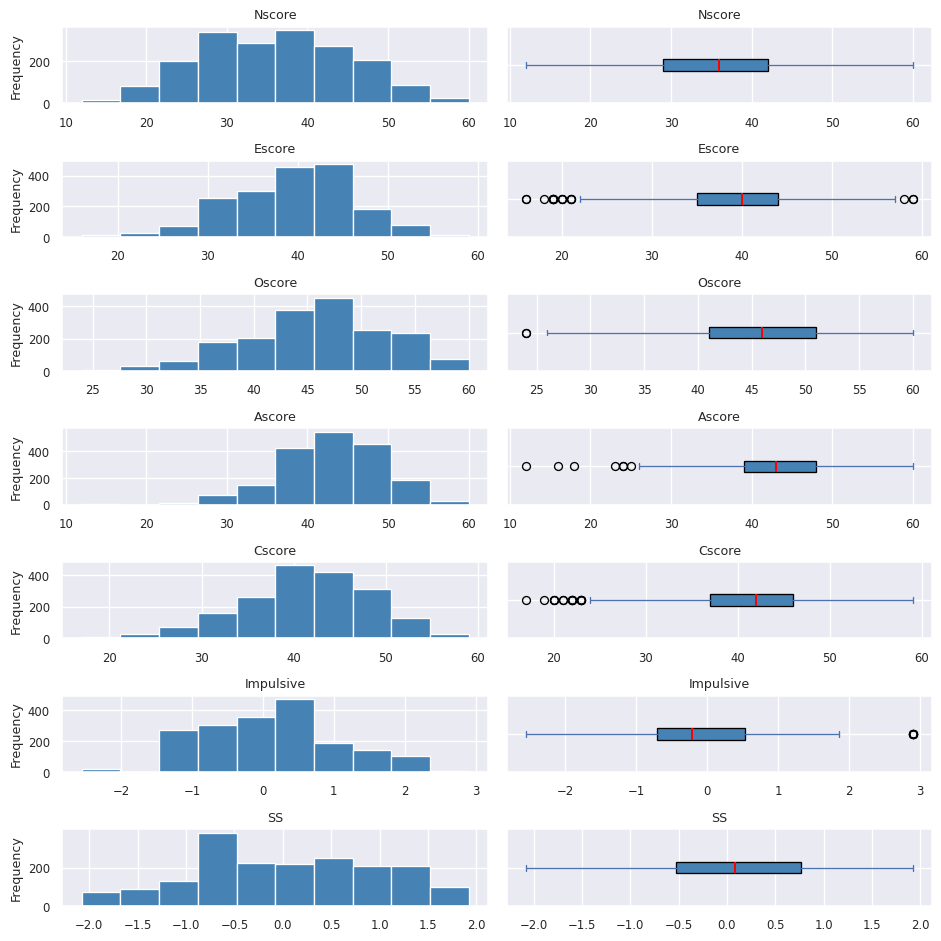

In [219]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(num_columns),2,dpi=95,figsize=(10,10))
i = 0
for col in num_columns:
    drugs[col].plot(kind='hist',ax=axs[i,0], title=col, color="steelblue")
    drugs[col].plot(kind='box',vert=False,ax=axs[i,1], title=col,
                                             patch_artist = True,
           boxprops = dict(facecolor = "steelblue"),
                                             medianprops = dict(color = "red", linewidth = 1.5)).set_yticklabels('')

    i+=1
fig.tight_layout()
plt.show()


Tunnused ei ole tugeva, aga vasakpoolse asümmeetriaga.

### Mittearvuliste atribuutide kirjeldus

Mittearvuliste tunnuste karakteristikud:

In [220]:
drugs.describe(include=[object]).T

,count,unique,top,freq
Age,1877,6,18 - 24,637
Gender,1877,2,Male,940
Education,1877,9,"Some College,No Certificate Or Degree",503
Country,1877,7,UK,1044
Ethnicity,1877,7,White,1715
Alcohol,1877,7,Used in Last Week,758
Amphet,1877,7,Never Used,973
Amyl,1877,7,Never Used,1299
Benzos,1877,7,Never Used,999
Caff,1877,7,Used in Last Day,1380


Mittearvuliste tunnuste väärtuste sagedustabelid:

In [221]:
for column in drugs.select_dtypes(include=object).columns:
   # print(column)
    print(drugs[column].value_counts().sort_index())
    print()

Age
18 - 24    637
25 - 34    480
35 - 44    355
45 - 54    294
55 - 64     93
65+         18
Name: count, dtype: int64

Gender
Female    937
Male      940
Name: count, dtype: int64

Education
Doctorate Degree                          89
Left School Before 16 years               28
Left School at 16 years                   98
Left School at 17 years                   29
Left School at 18 years                   99
Masters Degree                           283
Professional Certificate/ Diploma        270
Some College,No Certificate Or Degree    503
University Degree                        478
Name: count, dtype: int64

Country
Australia                52
Canada                   87
New Zealand               5
Other                   118
Republic of Ireland      20
UK                     1044
USA                     551
Name: count, dtype: int64

Ethnicity
Asian                  25
Black                  33
Mixed-Black/Asian       3
Mixed-White/Asian      20
Mixed-White/Black      19
Othe

Meie hüpoteesi jaoks otsustasime kasutada N-skoori ja O-skoori, millest arvutame inimese temperamendi. Leidsime artikli, kus on toodud järgmine jaotus (vt foto).


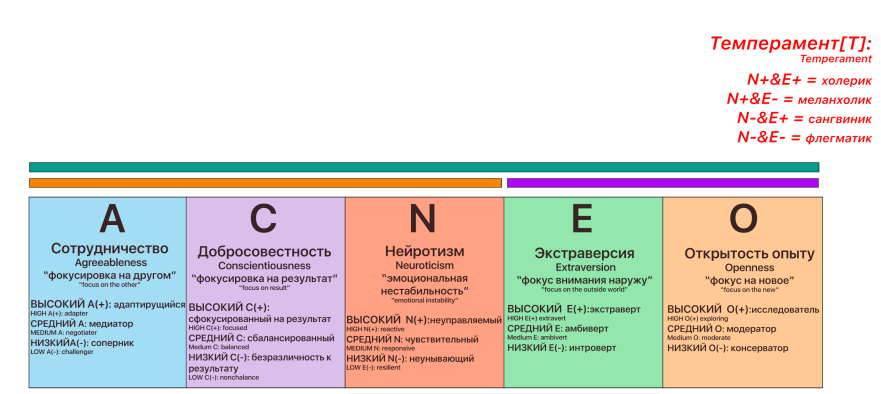

In [222]:
# Loome Y:
'''
def label_Temp(row):
   if row['Cscore'] >= 33 and row['Ascore'] >= 33 and row['Oscore'] >= 33 and row['Escore'] >= 33 and row['Nscore'] < 33:
      return 'High'
   if row['Cscore'] < 33 and row['Ascore'] < 33 and row['Oscore'] < 33 and row['Escore'] < 33 and row['Nscore'] >= 33:
      return 'Low'
   else : return 'Norm'
'''
def label_Temp(row):
   if row['Impulsive'] >= 0:
      return 'High'
   if row['Impulsive'] < 0:
      return 'Low'

drugs.apply(label_Temp, axis=1)

,0
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
1880,High
1881,High
1882,High
1883,High


In [223]:
drugs['Temperament'] = drugs.apply(label_Temp, axis=1)

In [224]:
drugs = drugs.drop(['Country', 'Ethnicity', 'Impulsive', 'SS'], axis=1)

In [225]:
drugs['Age'] = drugs['Age'].replace('65+' , '55 - 64')
drugs['Age'] = drugs['Age'].replace('55 - 64' , '55+')
ed_col = {
    'Left School Before 16 years' : 'Left School',
    'Left School at 16 years' : 'Left School',
    'Left School at 17 years' : 'Left School',
    'Left School at 18 years' : 'Left School'
    }
drugs['Education'] = drugs['Education'].replace(ed_col)


usage_col = {
    'Used over a Decade Ago' : 'R',
    'Used in Last Decade' : 'R',
    'Used in Last Week' : 'F',
    'Used in Last Day' : 'F',
    'Used in Last Month': 'F',
    'Used in Last Year': 'R',
    'Never Used' : 'N'
    }

drugs['Alcohol'] = drugs['Alcohol'].replace(usage_col)
drugs['Amphet'] = drugs['Amphet'].replace(usage_col)
drugs['Amyl'] = drugs['Amyl'].replace(usage_col)
drugs['Benzos'] = drugs['Benzos'].replace(usage_col)
drugs['Caff'] = drugs['Caff'].replace(usage_col)
drugs['Cannabis'] = drugs['Cannabis'].replace(usage_col)
drugs['Choc'] = drugs['Choc'].replace(usage_col)
drugs['Coke'] = drugs['Coke'].replace(usage_col)
drugs['Ecstasy'] = drugs['Ecstasy'].replace(usage_col)
drugs['Heroin'] = drugs['Heroin'].replace(usage_col)
drugs['Ketamine'] = drugs['Ketamine'].replace(usage_col)
drugs['Legalh'] = drugs['Legalh'].replace(usage_col)
drugs['LSD'] = drugs['LSD'].replace(usage_col)
drugs['Meth'] = drugs['Meth'].replace(usage_col)
drugs['Mushrooms'] = drugs['Mushrooms'].replace(usage_col)
drugs['Nicotine'] = drugs['Nicotine'].replace(usage_col)
drugs['VSA'] = drugs['VSA'].replace(usage_col)
drugs['Crack'] = drugs['Crack'].replace(usage_col)


In [226]:
for column in drugs.select_dtypes(include=object).columns:
   # print(column)
    print(drugs[column].value_counts().sort_index())
    print()

Age
18 - 24    637
25 - 34    480
35 - 44    355
45 - 54    294
55+        111
Name: count, dtype: int64

Gender
Female    937
Male      940
Name: count, dtype: int64

Education
Doctorate Degree                          89
Left School                              254
Masters Degree                           283
Professional Certificate/ Diploma        270
Some College,No Certificate Or Degree    503
University Degree                        478
Name: count, dtype: int64

Alcohol
F    1545
N      33
R     299
Name: count, dtype: int64

Amphet
F    237
N    973
R    667
Name: count, dtype: int64

Amyl
F      41
N    1299
R     537
Name: count, dtype: int64

Benzos
F    298
N    999
R    580
Name: count, dtype: int64

Caff
F    1757
N      27
R      93
Name: count, dtype: int64

Cannabis
F    781
N    413
R    683
Name: count, dtype: int64

Choc
F    1780
N      32
R      65
Name: count, dtype: int64

Coke
F     157
N    1036
R     684
Name: count, dtype: int64

Crack
F      20
N    1622
R

In [227]:
drugs = drugs.drop(['VSA', 'Meth', 'Ketamine', 'Heroin', 'Crack', 'Nicotine', 'Coke', 'Choc', 'Caff', 'Alcohol'], axis=1)

### Sihttunnuse Y kirjeldus ja teisendamine
Antud uuringu  **eesmärk**: sõltuvusainete tarvitamise kalduvuse ennustamine temperamendi järgi. **Sihttunnus**: Y = Temperament.

Kontrollime, erinevate klasside sagedusi. Võrdsed sagedused võimaldavad kasutada lihtsat täpsusskoori.

In [228]:
drugs["Temperament"].value_counts().sort_index()

,count
Temperament,
High,921
Low,956


In [229]:
#drugs = drugs[drugs['Temperament'] != 'Phlegmatic']
drugs.shape

(1877, 17)

In [230]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

drugs['Temperament'] = label_encoder.fit_transform(drugs['Temperament'])
drugs['Temperament'].sort_values().unique()

array([0, 1])

Nüüd sihttunnus on arvuline.

In [231]:
drugs['Temperament'].dtypes

dtype('int64')

In [232]:
drugs['Temperament'].value_counts().sort_index()

,count
Temperament,
0,921
1,956


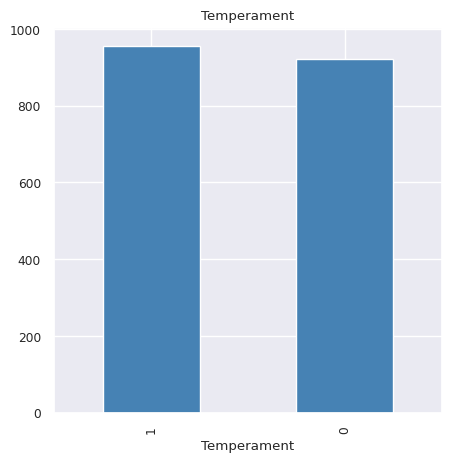

In [233]:
fig = plt.figure(figsize=(5,5))
drugs['Temperament'].value_counts().plot(kind='bar', title="Temperament", color="steelblue")

plt.show()

<a id='seos'> </a>

## Seoste analüüs

### Seosed arvuliste tunnuste vahel
Visualiseerime arvuliste tunnuste vahelised sõltuvused seaborn teegi funktsiooni pairplot() abil:

In [234]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1877 entries, 0 to 1884
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1877 non-null   object 
 1   Gender       1877 non-null   object 
 2   Education    1877 non-null   object 
 3   Nscore       1877 non-null   float64
 4   Escore       1877 non-null   float64
 5   Oscore       1877 non-null   float64
 6   Ascore       1877 non-null   float64
 7   Cscore       1877 non-null   float64
 8   Amphet       1877 non-null   object 
 9   Amyl         1877 non-null   object 
 10  Benzos       1877 non-null   object 
 11  Cannabis     1877 non-null   object 
 12  Ecstasy      1877 non-null   object 
 13  Legalh       1877 non-null   object 
 14  LSD          1877 non-null   object 
 15  Mushrooms    1877 non-null   object 
 16  Temperament  1877 non-null   int64  
dtypes: float64(5), int64(1), object(11)
memory usage: 264.0+ KB


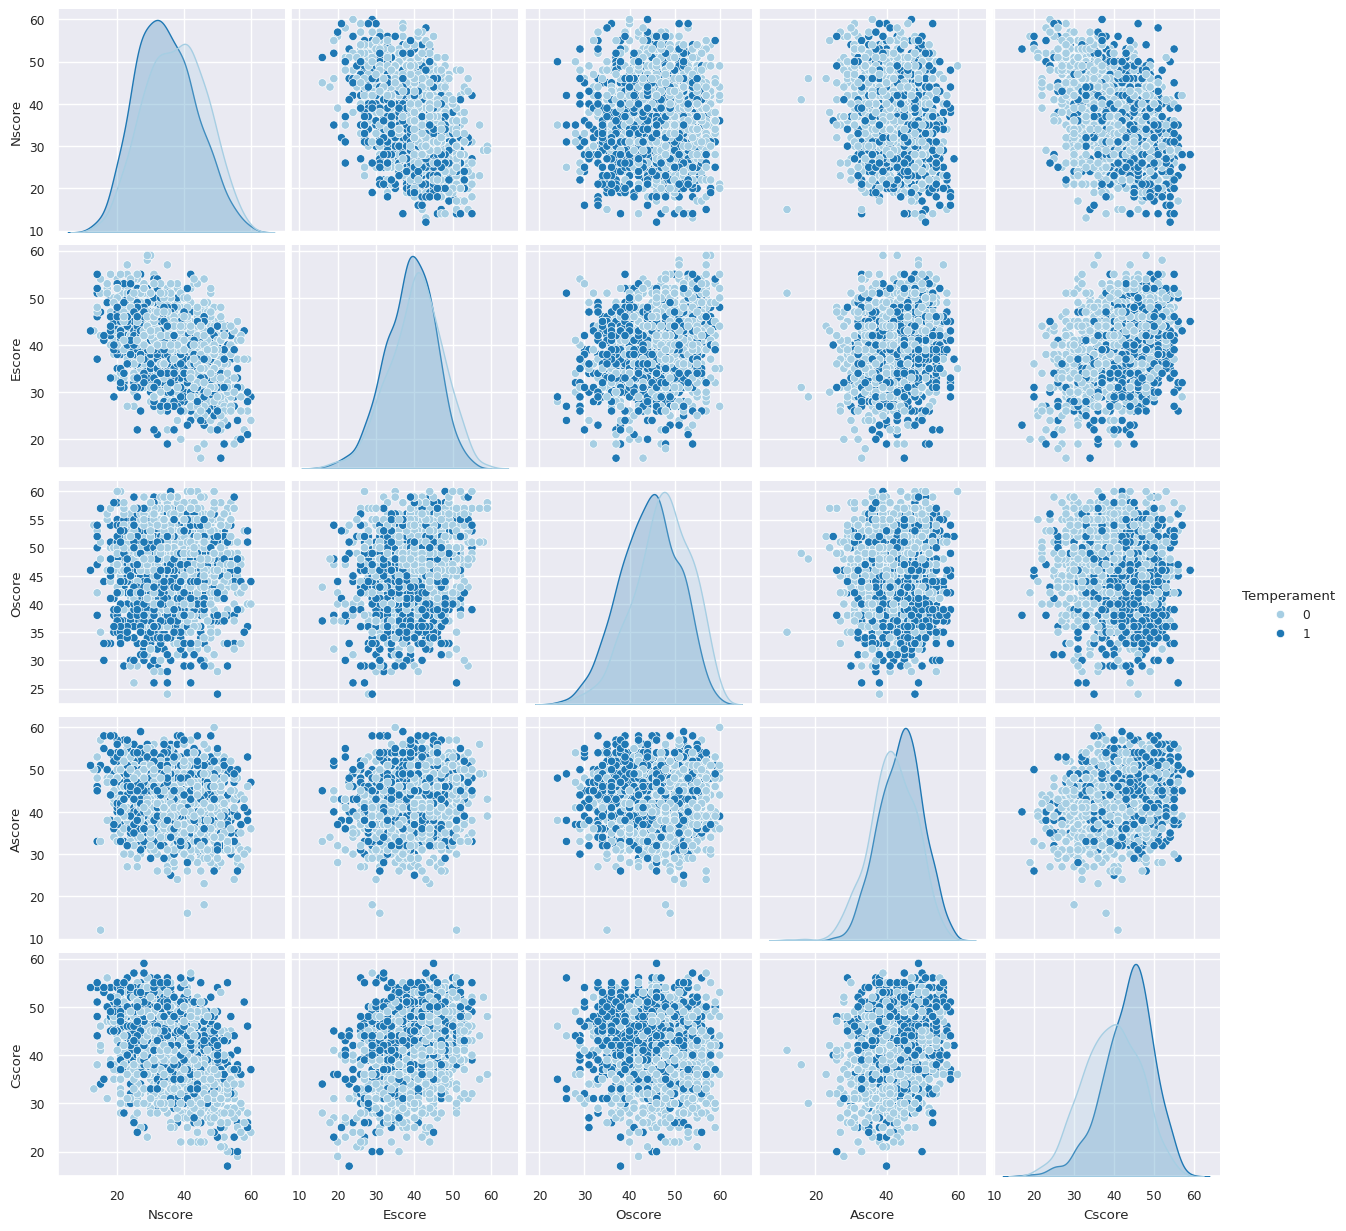

In [235]:
import seaborn as sns
sns.pairplot(drugs.select_dtypes(exclude=object), hue="Temperament", diag_kind="kde",palette="Paired")
plt.show()

Visuaalselt seoseid sihttunnusega pole, argumendid on sõltumatud. Töötab aeglaselt ja rohkem sobib väikeste andmestike puhul

Arvuliste tunnuste korrelatsioonimaatriks:



In [236]:
drugs.select_dtypes(exclude=object).corr()

,Nscore,Escore,Oscore,Ascore,Cscore,Temperament
Nscore,1.00,-0.43,0.01,-0.22,-0.40,-0.15
Escore,-0.43,1.00,0.24,0.16,0.32,-0.11
Oscore,0.01,0.24,1.00,0.03,-0.06,-0.23
Ascore,-0.22,0.16,0.03,1.00,0.25,0.19
Cscore,-0.40,0.32,-0.06,0.25,1.00,0.30
Temperament,-0.15,-0.11,-0.23,0.19,0.30,1.00


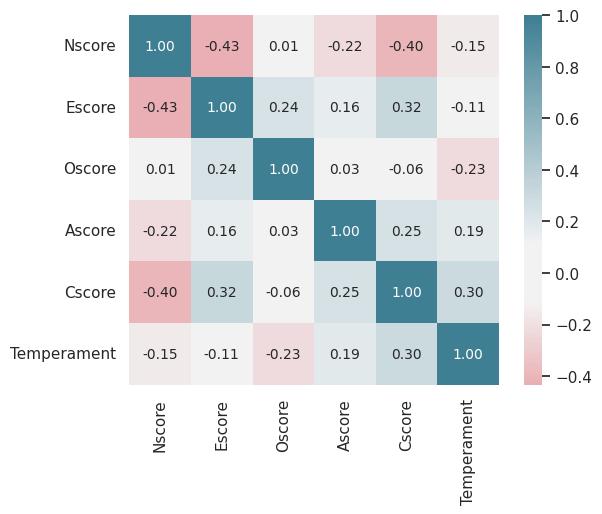

In [237]:
num_f=drugs.select_dtypes(exclude=object)
sns.set(font_scale=1.0)
hm = sns.heatmap(num_f.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=num_f.columns,
                 xticklabels=num_f.columns,
                 cmap=sns.diverging_palette(10, 220, sep=30, n=256),
                 center=0.0)
plt.show()

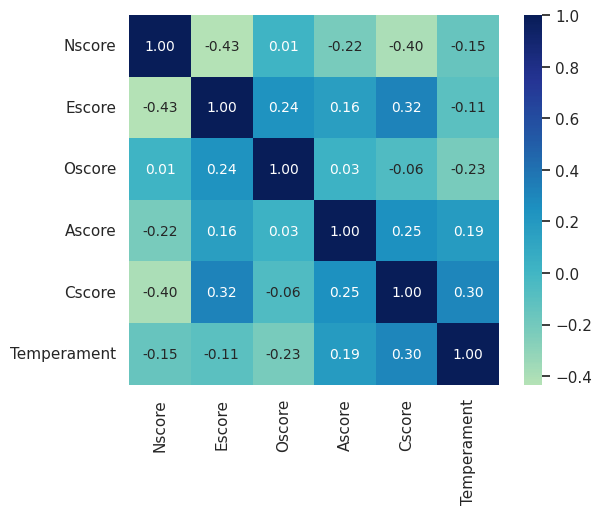

In [238]:
num_f=drugs.select_dtypes(exclude=object)
sns.set(font_scale=1.0)
hm = sns.heatmap(num_f.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=num_f.columns,
                 xticklabels=num_f.columns,
                 cmap="YlGnBu",
                 center=0.0)
plt.show()

Kui meid huvitab seos ainult sihttunnusega, siis võime vajalikud korrelatsioonid välja filtreerida:

In [239]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
num_f.corrwith(drugs["Temperament"]).sort_values()

,0
Oscore,-0.2253
Nscore,-0.1520
Escore,-0.1080
Ascore,0.1855
Cscore,0.2994
Temperament,1.0000


Ja kuumakaardil:

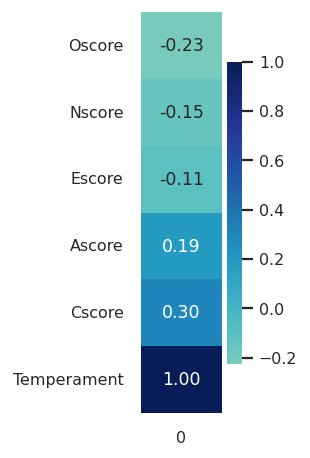

In [240]:
plt.figure(dpi=130,figsize=(1,4))
sns.set(font_scale=0.8)
sns.heatmap(pd.DataFrame(num_f.corrwith(drugs["Temperament"]).sort_values()), fmt='.2f',
            annot=True, cmap="YlGnBu",
                 center=0.0)
plt.show()

Seosed sihttunnusega on väga nõrgad.

Visualiseerime arvuliste tunnuste seost ennustatava klassiga karpdiagrammidel:

In [241]:
num_columns


Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'], dtype='object')

In [242]:
'''
num_columns = drugs.select_dtypes(exclude=object).columns
num_columns = num_columns.drop(['Temperament'])


fig, axs = plt.subplots(len(num_columns),1,dpi=95,figsize=(8,12))
i = 0
for col in num_columns:
 b=drugs.boxplot(column=col,by=['Temperament'],ax=axs[i],
 patch_artist = True,
 boxprops = dict(facecolor = "steelblue"),
 medianprops = dict(color = "red", linewidth = 1.5)).set_xlabel("class")
 i+=1
fig.tight_layout()
plt.suptitle('')
'''

'\nnum_columns = drugs.select_dtypes(exclude=object).columns\nnum_columns = num_columns.drop([\'Temperament\'])\n\n\nfig, axs = plt.subplots(len(num_columns),1,dpi=95,figsize=(8,12))\ni = 0\nfor col in num_columns:\n b=drugs.boxplot(column=col,by=[\'Temperament\'],ax=axs[i],\n patch_artist = True,\n boxprops = dict(facecolor = "steelblue"),\n medianprops = dict(color = "red", linewidth = 1.5)).set_xlabel("class")\n i+=1\nfig.tight_layout()\nplt.suptitle(\'\')\n'

Muutujate jaotused klassides näitavad tunnuste mõju ennustatavale klassile.

### Sihttunnuse seos kategoriaalsete tunnustega

Uurime, kuidas on seotud teised faktorid sihttunnusega Temperament.

In [243]:
categ_columns=drugs.select_dtypes(include=object).columns
categ_columns

Index(['Age', 'Gender', 'Education', 'Amphet', 'Amyl', 'Benzos', 'Cannabis',
       'Ecstasy', 'Legalh', 'LSD', 'Mushrooms'],
      dtype='object')

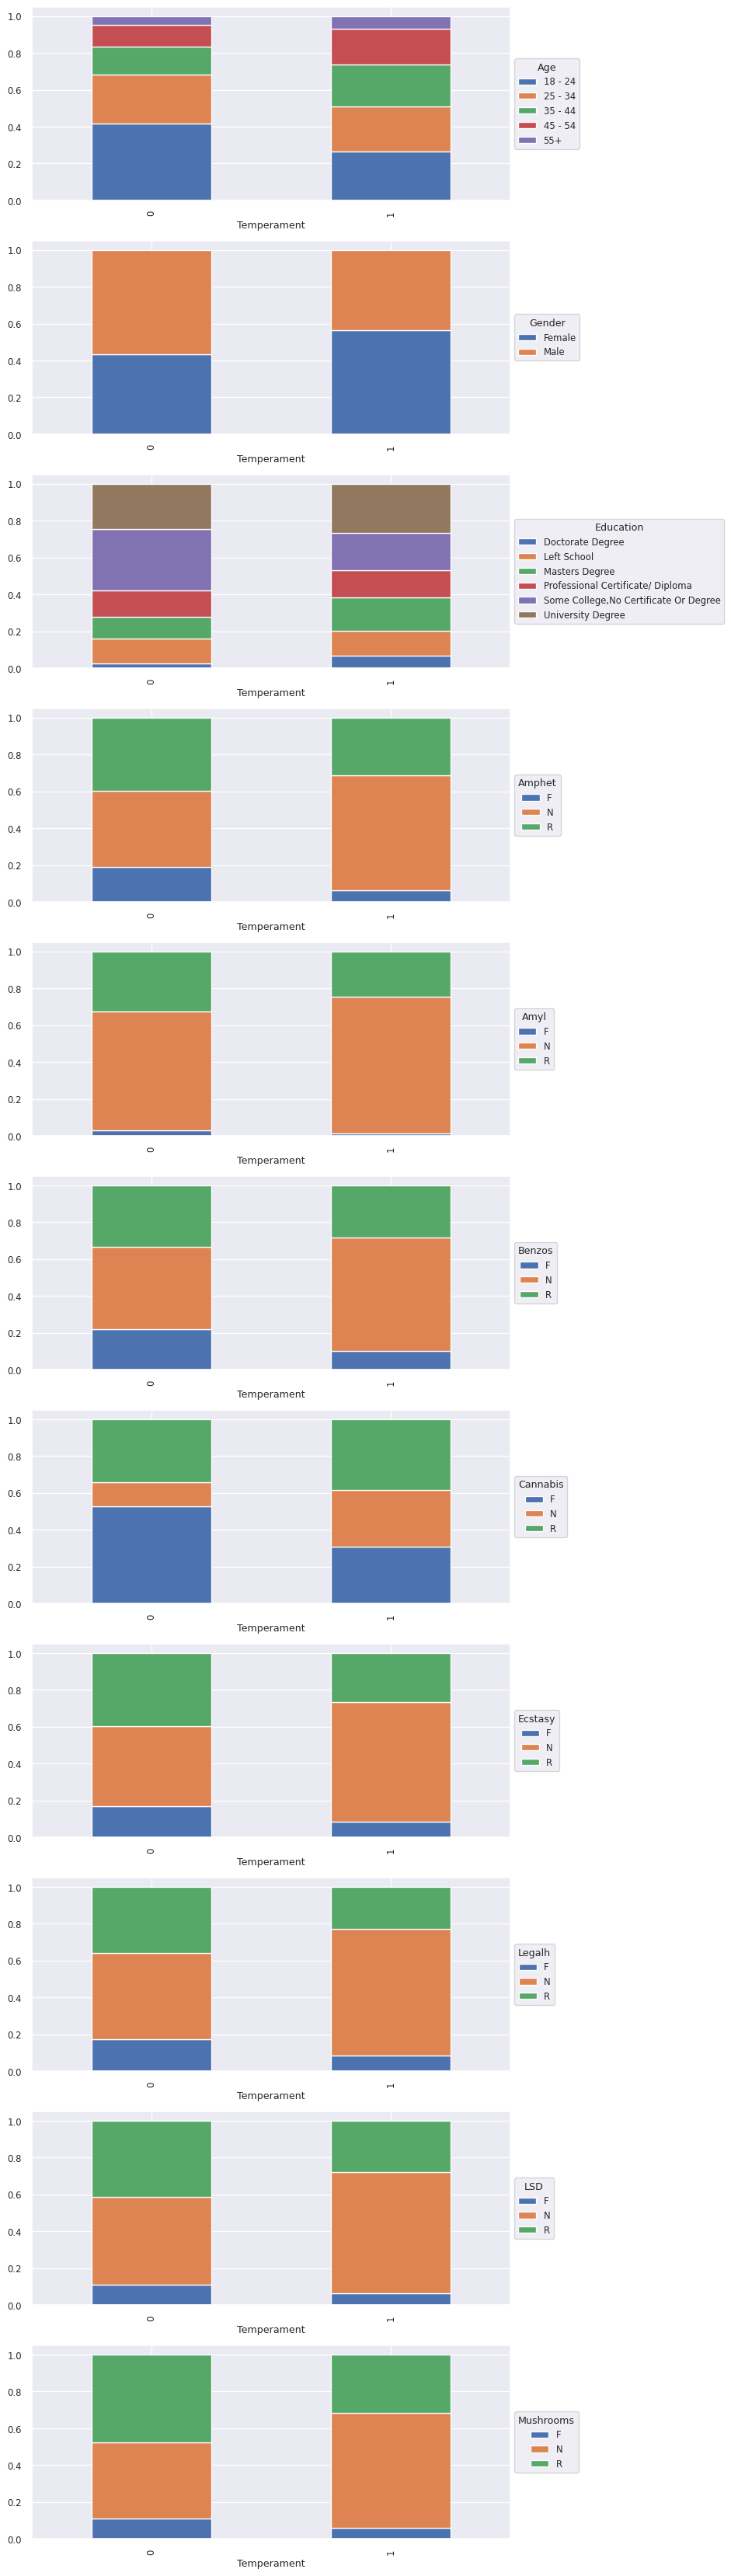

In [244]:
fig, axs = plt.subplots(len(categ_columns),1,dpi=95,figsize=(10,35))
i = 0
for col in categ_columns:
    cross_tab_prop = pd.crosstab(index=drugs['Temperament'],
                             columns=drugs[col],
                             normalize="index")
    cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    ax=axs[i]).legend(loc='center left',bbox_to_anchor=(1.0, 0.5),title=col)
    i+=1
#plt.suptitle('')
fig.tight_layout()
plt.show()

<a id='puu'> </a>

# Mudeli konstrueerimine


### Andmete ettevalmistamine
Omistame andmemaatriksi muutujale X ja sihttunuse vektori muutujale y.

In [245]:
drugs

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Amphet,Amyl,Benzos,Cannabis,Ecstasy,Legalh,LSD,Mushrooms,Temperament
0,35 - 44,Female,Professional Certificate/ Diploma,39.0000,36.0000,42.0000,37.0000,42.0000,R,N,R,N,N,N,N,N,1
1,25 - 34,Male,Doctorate Degree,29.0000,52.0000,55.0000,48.0000,41.0000,R,R,N,F,F,N,R,N,1
2,35 - 44,Male,Professional Certificate/ Diploma,31.0000,45.0000,40.0000,32.0000,34.0000,N,N,N,R,N,N,N,R,1
3,18 - 24,Female,Masters Degree,34.0000,34.0000,46.0000,47.0000,46.0000,N,N,R,R,N,N,N,N,1
4,35 - 44,Female,Doctorate Degree,43.0000,28.0000,43.0000,41.0000,50.0000,R,R,N,R,R,R,N,R,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18 - 24,Female,"Some College,No Certificate Or Degree",25.0000,51.0000,57.0000,48.0000,33.0000,N,N,N,F,N,R,R,N,0
1881,18 - 24,Male,"Some College,No Certificate Or Degree",33.0000,51.0000,50.0000,48.0000,30.0000,N,N,N,R,R,R,F,F,0
1882,25 - 34,Female,University Degree,47.0000,30.0000,37.0000,31.0000,31.0000,F,F,F,F,F,N,R,R,0
1883,18 - 24,Female,"Some College,No Certificate Or Degree",45.0000,26.0000,48.0000,32.0000,22.0000,N,N,N,F,R,R,R,R,0


In [246]:
X = drugs.drop(['Temperament'],axis=1)
y = drugs['Temperament']

Treening- ja testandmete eraldamine

Jagame andmestik treening- (X_train, y_train) ja testandmeteks (X_test, y_test). Selle jaoks kasutame mooduli model_selection funktsiooni train_test_split(). Funktsiooni parameetreid määravad testandmete proportsiooni koguandmetest (20%) ja juhuarvude generaatori sisendmuutuja.

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [248]:
y_train.value_counts().sort_index()

,count
Temperament,
0,737
1,764


In [249]:
y_test.value_counts().sort_index()

,count
Temperament,
0,184
1,192


### Konveier (pipeline) otsustuspuu mudelile
**Konveier (Pipeline)** kombineerib erinevad teisendused ja ennustajad kokku ühendobjektiks.


Numbriliste ja kategooriliste muutujate mudelis kasutamine

Eraldame kategoorilised ja numbrilised muutujad, kasutades nende identifitseerimiseks nende andmetüüpe. Nagu nägime eelnevalt, objekt vastab kategoorilistele veergudele. Kasutame vastavate veergude valimiseks make_column_select

In [250]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [251]:
numerical_columns

['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']

In [252]:
categorical_columns

['Age',
 'Gender',
 'Education',
 'Amphet',
 'Amyl',
 'Benzos',
 'Cannabis',
 'Ecstasy',
 'Legalh',
 'LSD',
 'Mushrooms']

Me peame numbrilised ja kategoorilised andmeid valmistama ette modelleerimiseks erinevalt:

kategoorilised andmed: tunnuste väärtuste indikaatortunnustega asendamine (one-hot encoding),
numbrilised andmed: standardiseerimine/normaliseerimine.
Scikit-learn pakub klassi ColumnTransformer, mis lubab jaotada konveieri (pipeline) kaheks osaks, edastades konkreetsed veerud konkreetsetele teisendusmeetoditele. See lubab ühendada mõlemat liiki muutujaid ühes konveieris koos.

In [253]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
categorical_preprocessor = OneHotEncoder(drop='first')

Eelprotsessor numbriliste tunnuste jaoks:

In [254]:
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures
numerical_preprocessor = StandardScaler()

Nüüd loome ColumnTransfomer ja seostame eelprotsessorid vastavate veergudega:

In [255]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("ctg", categorical_preprocessor, categorical_columns),
        ("num", numerical_preprocessor, numerical_columns),
    ]
)

Järgmiseks tekitame otsustuspuu mudeli. Vaikimisi konstrueeritakse Gini indeksi põhjal täispuu: sõlmed laiendatakse, kuni kõik lehed on puhtad või kuni kõik lehed sisaldavad 1 objekti.

<a id='rf'> </a>

## Random Forest mudeli konstrueerimine
Konveier (pipeline): Random Forest

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestClassifier(random_state=0))])

Mudeli treenimine:

In [257]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('ctg',
                                                  OneHotEncoder(drop='first'),
                                                  ['Age', 'Gender', 'Education',
                                                   'Amphet', 'Amyl', 'Benzos',
                                                   'Cannabis', 'Ecstasy',
                                                   'Legalh', 'LSD',
                                                   'Mushrooms']),
                                                 ('num', StandardScaler(),
                                                  ['Nscore', 'Escore', 'Oscore',
                                                   'Ascore', 'Cscore'])])),
                ('rf', RandomForestClassifier(random_state=0))])

Mudeli täpsus treenimisandmetel on 100%:

In [258]:
rf_pipe.score(X_train, y_train)

1.0

Leiame ristvalideerimise täpsusskoorid, vaikimisi tehakse cv=5 ehk 5-kihiline ristvalideerimine:

In [259]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_pipe.fit(X_train, y_train), X_train, y_train)
print('CV täpsus treeningandmetel: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))

CV täpsus treeningandmetel: 0.682 +/- 0.044


CV täpsus treeningandmetel: 0.518 +/- 0.026
Mudel on ületreenitud, kuna ristvalideerimisel täpsus langes väga oluliselt.

Mudeli testandmetel kontrollimine: leiame ennustused y_pred testandmetel kasutades meetodit predict().

In [260]:
y_pred = rf_pipe.predict(X_test)

Mudeli täpsusskoorid:

In [261]:
from sklearn.metrics import classification_report
print('Accuracy of classifier on test set: {:.2f}'
 .format(rf_pipe.score(X_test, y_test)))
print()
print(classification_report(y_test, y_pred))

Accuracy of classifier on test set: 0.63

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       184
           1       0.63      0.67      0.65       192

    accuracy                           0.63       376
   macro avg       0.63      0.63      0.63       376
weighted avg       0.63      0.63      0.63       376



Mudeli täpsus testandmetel on madal: 55%.

Segadusmaatriksi testandmetel:

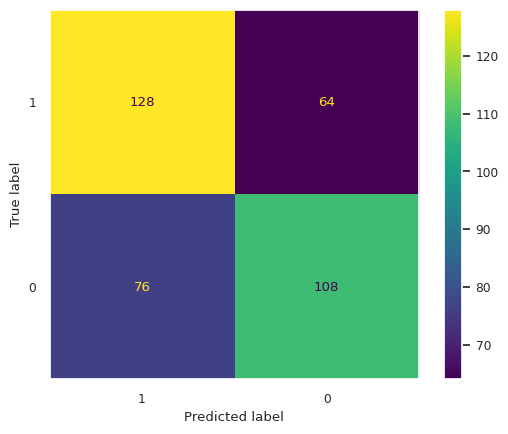

In [262]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=drugs["Temperament"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=drugs["Temperament"].unique())
disp.plot()
plt.grid(None)

Kõige halvemeni ennustatakse klass X.

Kasutame parameetrite GridSearchCV tuunimist: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Kasutame n_jobs=-1 arvutuste paralleliseerimiseks! See tähendab, et kõik tuumad on kasutatud paralleelarvutamiseks.

In [ ]:
parameters={'rf__max_depth':[4,5,None],
              'rf__n_estimators':[1000,1500,2000, 3000],
              'rf__max_features':[5,7,9]}

gs_rf_pipe = GridSearchCV(estimator=rf_pipe, param_grid=parameters, cv=5, verbose=0,n_jobs=-1)

%time gs_rf_pipe.fit(X_train, y_train)

In [ ]:
gs_rf_pipe.best_params_

In [ ]:
random_treen = gs_rf_pipe.score(X_train, y_train)
print('Mudeli täpsus treenimisandmetel on %.3f' % random_treen)

Mudeli täpsusskoorid testandmetel:

In [ ]:
y_pred =gs_rf_pipe.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('Accuracy of classifier on test set: {:.2f}'
 .format(gs_rf_pipe.score(X_test, y_test)))
print()
print(classification_report(y_test, y_pred))

Mudeli täpsus testandmetel on 58%.

Segadusmaatriksi testandmetel:

In [ ]:
y_pred = gs_rf_pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=drugs["Temperament"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=drugs["Temperament"].unique())
disp.plot()
plt.grid(None)

Mudeli tähtsamad argumendid Leiame kõige mõjukamad argumendid iirise ennustamisel:

In [ ]:
imp = pd.DataFrame(gs_rf_pipe.best_estimator_[1].feature_importances_)
ft = pd.DataFrame(preprocessor.get_feature_names_out())
ft_imp = pd.concat([ft,imp],axis=1)
ft_imp.columns = ['Feature', 'Importance']
ft_imp.sort_values(by='Importance',ascending=False)

<a id='nv'> </a>

## Närvivõrgu mudeli konstrueerimine

Konveier (pipeline) MLP närvivõrgu mudelile:

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([
    ('pre', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(5,),
                     activation='tanh', solver='adam', learning_rate_init=0.0005,
                     batch_size=32, alpha=0, max_iter = 500,
                     n_iter_no_change = 10000, warm_start=True,
                     verbose=False, random_state=12))])

In [ ]:
mlp_pipe.fit(X_train, y_train)

Mudeli täpsus treenimisandmetel on 59,16%:

In [ ]:
mlp_pipe.score(X_train, y_train)

Leiame ristvalideerimise täpsusskoorid, vaikimisi tehakse cv=5 ehk 5-kihiline ristvalideerimine:

Kasutame n_jobs=-1 arvutuste paralleliseerimiseks! See tähendab, et kõik tuumad on kasutatud paralleelarvutamiseks.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_pipe.fit(X_train, y_train), X_train, y_train,n_jobs=-1)
print('CV täpsus treeningandmetel: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))

Mudeli ristvalideerimise täpsus: 54,5%.

Mudeli testandmetel kontrollimine: leiame ennustused y_pred testandmetel kasutades meetodit predict().

In [ ]:
y_pred = mlp_pipe.predict(X_test)

Mudeli täpsusskoorid:

In [ ]:
y_pred = mlp_pipe.predict(X_test)
from sklearn.metrics import classification_report
print('Accuracy of classifier on test set: {:.2f}'
 .format(mlp_pipe.score(X_test, y_test)))
print()
print(classification_report(y_test, y_pred))

Mudeli täpsus testandmetel on madal: 54%.

Segadusmaatriksi testandmetel:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=drugs["Temperament"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=drugs["Temperament"].unique())
disp.plot()
plt.grid(None)

Kõige halvemeni ennustatakse klass 1.

Kasutame parameetrite GridSearchCV tuunimist: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Kasutame n_jobs=-1 arvutuste paralleliseerimiseks! See tähendab, et kõik tuumad on kasutatud paralleelarvutamiseks.

In [ ]:
parameters={
    'mlp__hidden_layer_sizes': [(3,3),(5,5),(10,),(10, 5), (15,)],
    'mlp__activation': ['tanh', 'relu']}

gs_mlp_pipe = GridSearchCV(estimator=mlp_pipe, param_grid=parameters, cv=2, verbose=0,n_jobs=-1)

%time gs_mlp_pipe.fit(X_train, y_train)

In [ ]:
gs_mlp_pipe.best_params_

Mudeli täpsus treenimisandmetel:

In [ ]:
narvi_treen = gs_mlp_pipe.score(X_train, y_train)
print('Mudeli täpsus treenimisandmetel on %.3f' % narvi_treen)

Mudeli täpsusskoorid testandmetel:

In [ ]:
y_pred = gs_mlp_pipe.predict(X_test)
from sklearn.metrics import classification_report
print('Accuracy of classifier on test set: {:.2f}'
 .format(gs_mlp_pipe.score(X_test, y_test)))
print()
print(classification_report(y_test, y_pred))

Segadusmaatriksi testandmetel:

In [ ]:
y_pred = gs_mlp_pipe.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=drugs["Temperament"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=drugs["Temperament"].unique())
disp.plot()
plt.grid(None)

#Tulemused

Siin on tulemused

Mudel  | Treen  | Test
-------------------|--------------------|------------------
Otustuspuu       | 52%       | 51%
Random Forest      | 58%       | 62,4%
Närvivõrgu      | 58%       | 58,9%
SVM      | 58%       | 58,2%
AdaBoostClassifier        | -       | Row 2, Col 2
Random Forest      | Row 2, Col 1       | Row 2, Col 2
Random Forest      | Row 2, Col 1       | Row 2, Col 2

Otustuspuu mudeli täpsus testandmetel on 51%

Otustuspuu mudeli täpsus treenandmetel on 52%

---

Random Forest mudeli täpsus testandmetel on 62.4%

Random Forest mudeli täpsus treenandmetel on 58%

---

Närvivõrgu mudeli täpsus testandmetel on 58.9%

Närvivõrgu mudeli täpsus treenandmetel on 58%

---

SVM mudeli täpsus testandmetel on 58.2%

SVM mudeli täpsus treenandmetel on 58%

---

Ainult otsustuspuu mudel töötas halvemini, kui teised

  
**Kuna saadud tulemused on piisavalt madalad, ei saa me väita, et meie hüpotees osutus õigeks.**

In [ ]:
!pip install pycaret[full]

#HTML

In [ ]:
!pip install nbconvert

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Algoritmika/Klassifitseerimine/Kris_Data_analysis.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Algoritmika/Klassifitseerimine/Kris_Data_analysis.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/pyth